<a href="https://colab.research.google.com/github/Alenushka2013/Coursera/blob/master/Genesis_test_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/breed_ads.csv')

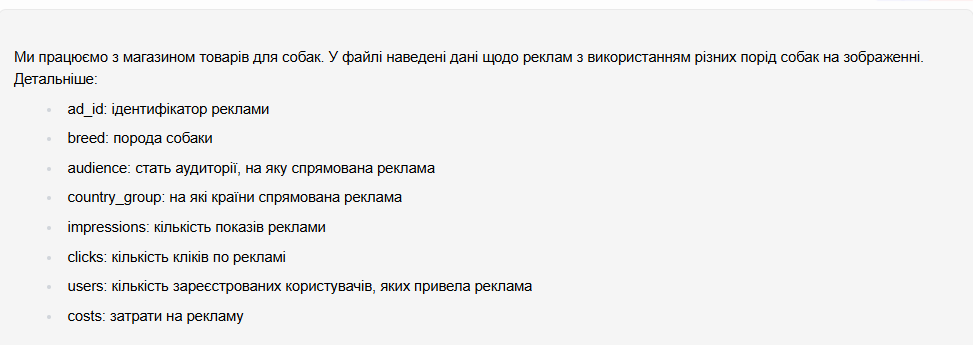

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ad_id          550 non-null    object 
 1   breed          550 non-null    object 
 2   audience       549 non-null    object 
 3   country_group  550 non-null    object 
 4   clicks         550 non-null    int64  
 5   impressions    550 non-null    int64  
 6   users          550 non-null    int64  
 7   costs          549 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 34.5+ KB


In [4]:
df.head()

ad_id    breed audience  \
0  SFz8962b5gF9Z9WrglXpkSkLcZ0gVWsPGR0raDDGmPU=  breed_2     Male   
1  XBY7gLyoZYUHnwrcb7CQXsXaQrL1VAaXxAR0C9ABqC0=  breed_1     Male   
2  /krLoIPXKGCFXxCp6ENaU/3enKHu7toWnaK/PwylhvM=  breed_2     Male   
3  OzzzUfAzWDs1OE6nCWYWaKxhMTB8TONA1jebmpvIvrI=  breed_1     Male   
4  vCYMDAhCERWSKiDte8Cq2DB7rlYb6NTKGUS662RiT30=  breed_2     Male   

  country_group  clicks  impressions  users     costs  
0         Other    6181       108446    254   7381.01  
1         Tier1    1035       128367    151   5686.12  
2         Tier1  440417     69284146   2448  73456.71  
3         Other   38875      2902476     78   1137.61  
4         Tier1  108755      3174165    651  10204.15

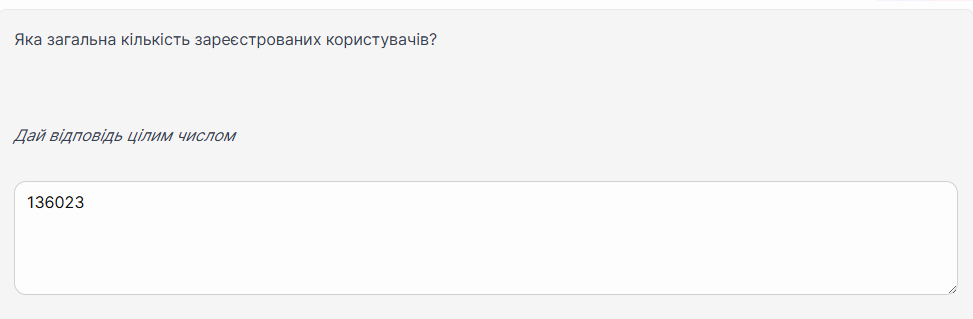

In [5]:
df.users.sum()

np.int64(136023)

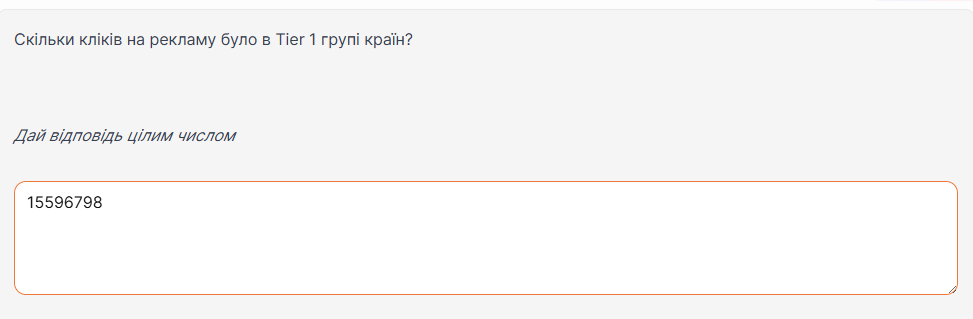

In [6]:
df.groupby('country_group').clicks.sum()

country_group
Other    85730061
Tier1    15596798
Name: clicks, dtype: int64

In [7]:
df.describe()

clicks   impressions        users          costs
count  5.500000e+02  5.500000e+02   550.000000     549.000000
mean   1.842307e+05  1.959592e+07   247.314545    4031.341894
std    1.696878e+06  1.926254e+08   865.514582   10815.615086
min    1.500000e+01  3.630000e+02    10.000000      47.790000
25%    7.787500e+02  3.295175e+04    18.000000     394.140000
50%    3.747500e+03  1.517625e+05    36.000000     784.680000
75%    1.699900e+04  6.607190e+05   114.000000    2400.810000
max    3.216684e+07  2.994684e+09  8956.000000  136906.300000

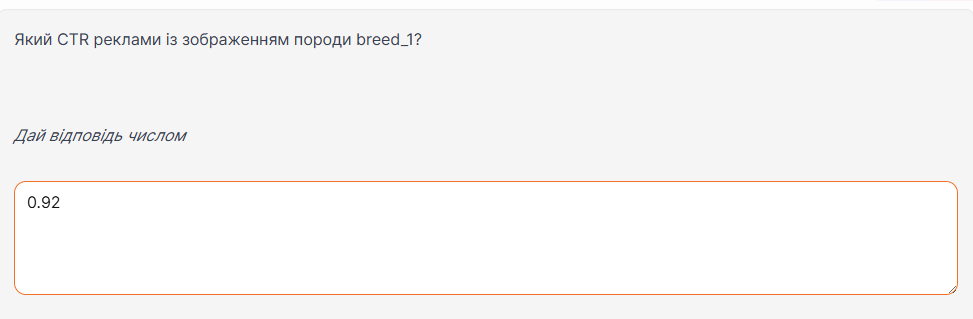

In [8]:
breed_1_df = df[df['breed'] == 'breed_1']
total_clicks = breed_1_df['clicks'].sum()
total_impressions = breed_1_df['impressions'].sum()

ctr = (total_clicks / total_impressions) * 100
print(f"CTR –¥–ª—è breed_1: {ctr:.2f}%")

CTR –¥–ª—è breed_1: 0.92%


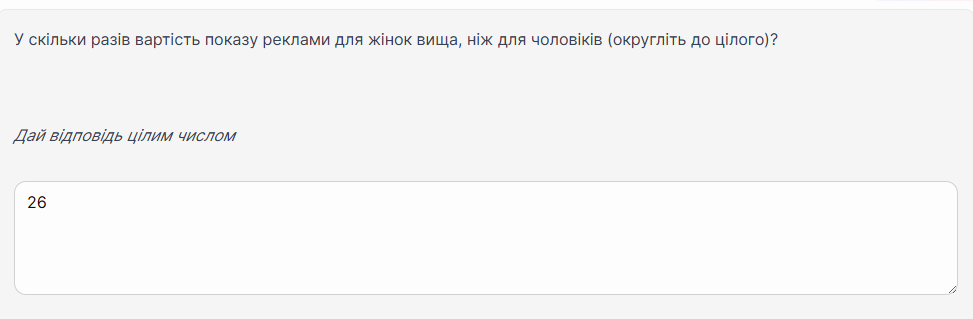

In [9]:
# –§—ñ–ª—å—Ç—Ä—É—î–º–æ –¥–∞–Ω—ñ
df_women = df[df['audience'] == 'Female']
df_men = df[df['audience'] == 'Male']

# –°—É–º–∞—Ä–Ω—ñ –ø–æ–∫–∞–∑–∏ —Ç–∞ –≤–∏—Ç—Ä–∞—Ç–∏
costs_women = df_women['costs'].sum()
impressions_women = df_women['impressions'].sum()

costs_men = df_men['costs'].sum()
impressions_men = df_men['impressions'].sum()

# –†–æ–∑—Ä–∞—Ö—É–Ω–æ–∫ CPM
cpm_women = (costs_women / impressions_women) * 1000
cpm_men = (costs_men / impressions_men) * 1000

# –£ —Å–∫—ñ–ª—å–∫–∏ —Ä–∞–∑—ñ–≤ –¥–æ—Ä–æ–∂—á–µ
ratio = cpm_women / cpm_men

print(f"CPM –¥–ª—è –∂—ñ–Ω–æ–∫: {cpm_women:.2f}")
print(f"CPM –¥–ª—è —á–æ–ª–æ–≤—ñ–∫—ñ–≤: {cpm_men:.2f}")
print(f"–†–µ–∫–ª–∞–º–∞ –¥–ª—è –∂—ñ–Ω–æ–∫ –¥–æ—Ä–æ–∂—á–∞ —É {ratio:.2f} —Ä–∞–∑(–∏)")

CPM –¥–ª—è –∂—ñ–Ω–æ–∫: 4.85
CPM –¥–ª—è —á–æ–ª–æ–≤—ñ–∫—ñ–≤: 0.18
–†–µ–∫–ª–∞–º–∞ –¥–ª—è –∂—ñ–Ω–æ–∫ –¥–æ—Ä–æ–∂—á–∞ —É 26.29 —Ä–∞–∑(–∏)


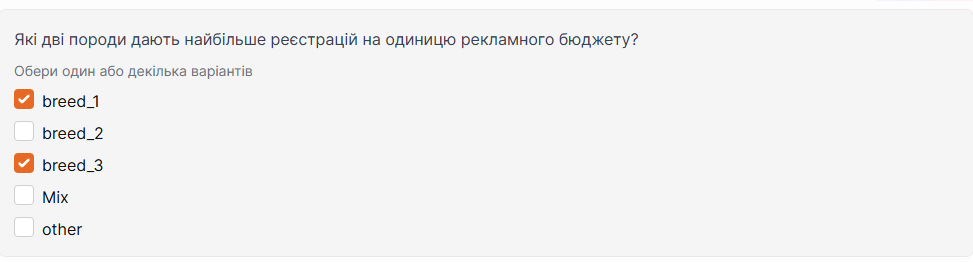

In [10]:
# –í–∏–¥–∞–ª—è—î–º–æ —Ä—è–¥–∫–∏ –∑ –ø—Ä–æ–ø—É—â–µ–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏ –≤ costs
df_clean = df.dropna(subset=['costs'])

# –ì—Ä—É–ø—É—î–º–æ –ø–æ –ø–æ—Ä–æ–¥–∞—Ö —Ç–∞ —Ä–∞—Ö—É—î–º–æ —Å—É–º—É users —ñ costs
breed_grouped = df_clean.groupby('breed').agg({'users': 'sum', 'costs': 'sum'})

# –û–±—á–∏—Å–ª—é—î–º–æ –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å (–∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ –Ω–∞ –æ–¥–∏–Ω–∏—Ü—é –±—é–¥–∂–µ—Ç—É)
breed_grouped['efficiency'] = breed_grouped['users'] / breed_grouped['costs']

# –°–æ—Ä—Ç—É—î–º–æ –≤—ñ–¥ –Ω–∞–π–µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—à–æ—ó –¥–æ –Ω–∞–π–≥—ñ—Ä—à–æ—ó
top_breeds = breed_grouped.sort_values('efficiency', ascending=False).head(5)

print(top_breeds[['efficiency']])

         efficiency
breed              
breed_3    0.067990
breed_1    0.063846
breed_2    0.047257
other      0.036609
Mix        0.035239


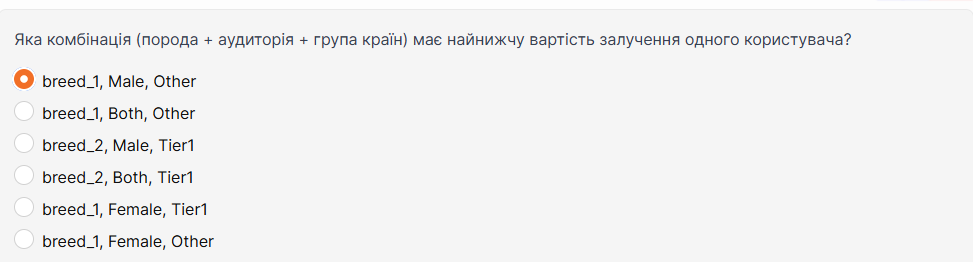

In [11]:
df_grouped = df_clean.groupby(['breed', 'audience', 'country_group']).agg({'users': 'sum', 'costs': 'sum'})
df_grouped['efficiency'] = df_grouped['costs']/df_grouped['users']
df_grouped.sort_values('efficiency')

users      costs  efficiency
breed   audience country_group                              
breed_1 Male     Other          28049  132859.55    4.736695
breed_3 Male     Other          16716  111704.79    6.682507
breed_2 Male     Other           6212   45193.97    7.275269
breed_1 Female   Other             61    1064.95   17.458197
breed_3 Male     Tier1          25041  499826.18   19.960312
Mix     Both     Tier1           1305   26077.31   19.982613
breed_1 Male     Tier1          41702  874173.03   20.962377
Mix     Male     Tier1            162    3834.29   23.668457
other   Female   Tier1             46    1169.50   25.423913
breed_3 Female   Tier1            225    5945.67   26.425200
breed_2 Male     Tier1          11184  312541.62   27.945424
breed_1 Female   Tier1           4265  144788.69   33.948110
Mix     Female   Tier1            428   22025.52   51.461495
breed_2 Female   Tier1            329   17342.61   52.713100
breed_1 Both     Tier1            183   10223.67   55.867049
Mix     Female   Other             49    3228.40   65.885714

In [12]:
# –í–∏–¥–∞–ª—è—î–º–æ —Ä—è–¥–∫–∏ –∑ –ø—Ä–æ–ø—É—â–µ–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏
df_clean = df.dropna(subset=['costs', 'users'])

# –ì—Ä—É–ø—É—î–º–æ –ø–æ breed, audience —ñ country_group
grouped = df_clean.groupby(['breed', 'audience', 'country_group']).agg({
    'users': 'sum',
    'costs': 'sum'
})

# –û–±—á–∏—Å–ª—é—î–º–æ –≤–∞—Ä—Ç—ñ—Å—Ç—å –∑–∞–ª—É—á–µ–Ω–Ω—è –æ–¥–Ω–æ–≥–æ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á–∞
grouped['cost_per_user'] = grouped['costs'] / grouped['users']

# –°–æ—Ä—Ç—É—î–º–æ —ñ –∑–Ω–∞—Ö–æ–¥–∏–º–æ –Ω–∞–π–Ω–∏–∂—á–µ –∑–Ω–∞—á–µ–Ω–Ω—è
best_combo = grouped.sort_values('cost_per_user').head(1)

print(best_combo[['cost_per_user']])

                                cost_per_user
breed   audience country_group               
breed_1 Male     Other               4.736695


## CTR

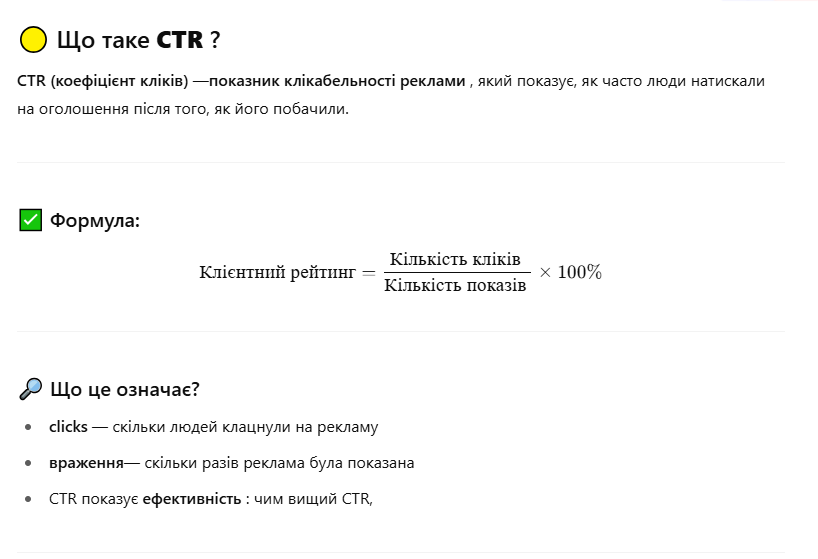

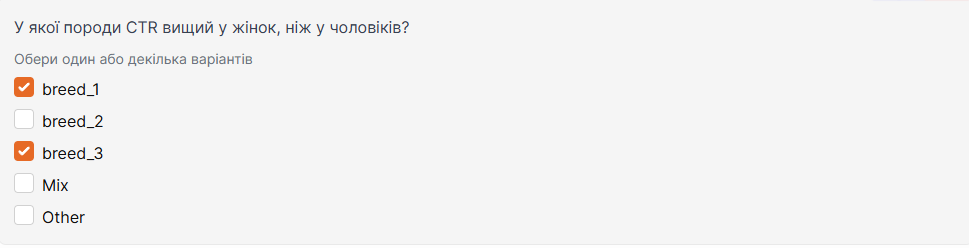

In [13]:
df_grouped = df.groupby(['breed', 'audience']).agg({'clicks': 'sum', 'impressions': 'sum'})
df_grouped['CTR'] = df_grouped['clicks'] / df_grouped['impressions'] * 100
df_grouped

clicks  impressions       CTR
breed   audience                                 
Mix     Both        166048      6649859  2.497015
        Female       24211      1111097  2.179018
        Male         33052       742768  4.449842
breed_1 Both         10312       800131  1.288789
        Female      801714     36457695  2.199025
        Male      75707448   8260334841  0.916518
breed_2 Female       46776      1912206  2.446180
        Male       6174148    224470513  2.750539
breed_3 Female       11316       538963  2.099588
        Male      18331012   2244014683  0.816885
other   Female        6450       290188  2.222697

In [14]:
# –ì—Ä—É–ø—É—î–º–æ –∑–∞ breed —Ç–∞ audience (—Å—Ç–∞—Ç—å), –æ–±—á–∏—Å–ª—é—î–º–æ —Å—É–º—É –∫–ª—ñ–∫—ñ–≤ —Ç–∞ –ø–æ–∫–∞–∑—ñ–≤
grouped = df.groupby(['breed', 'audience']).agg({
    'clicks': 'sum',
    'impressions': 'sum'
})

# –û–±—á–∏—Å–ª—é—î–º–æ CTR
grouped['CTR'] = grouped['clicks'] / grouped['impressions'] * 100

# –†–æ–∑–¥—ñ–ª—è—î–º–æ –Ω–∞ –æ–∫—Ä–µ–º—ñ —Ç–∞–±–ª–∏—Ü—ñ –¥–ª—è —á–æ–ª–æ–≤—ñ–∫—ñ–≤ —ñ –∂—ñ–Ω–æ–∫
ctr_women = grouped.loc[grouped.index.get_level_values('audience') == 'Female'].reset_index()
ctr_men = grouped.loc[grouped.index.get_level_values('audience') == 'Male'].reset_index()

# –û–±'—î–¥–Ω—É—î–º–æ –∑–∞ breed
merged = pd.merge(ctr_women, ctr_men, on='breed', suffixes=('_women', '_men'))

# –§—ñ–ª—å—Ç—Ä—É—î–º–æ, –¥–µ CTR —É –∂—ñ–Ω–æ–∫ –≤–∏—â–∏–π, –Ω—ñ–∂ —É —á–æ–ª–æ–≤—ñ–∫—ñ–≤
higher_ctr_for_women = merged[merged['CTR_women'] > merged['CTR_men']]

# –í–∏–≤–æ–¥–∏–º–æ –ø–æ—Ä–æ–¥–∏
print(higher_ctr_for_women[['breed', 'CTR_women', 'CTR_men']])

     breed  CTR_women   CTR_men
1  breed_1   2.199025  0.916518
3  breed_3   2.099588  0.816885


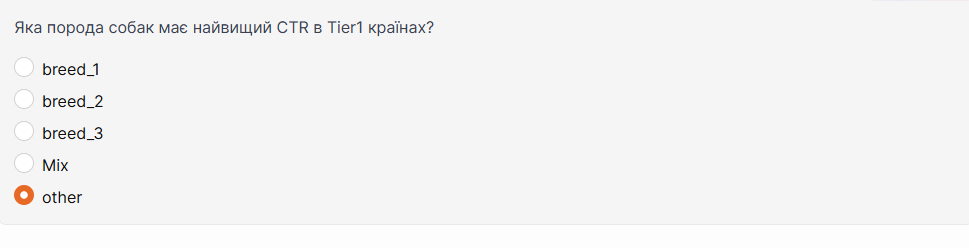

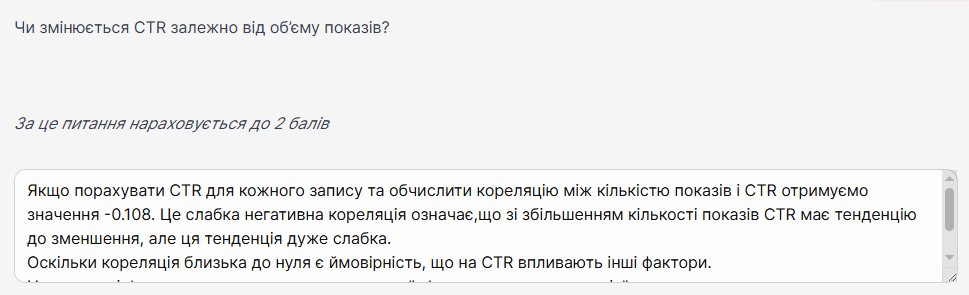

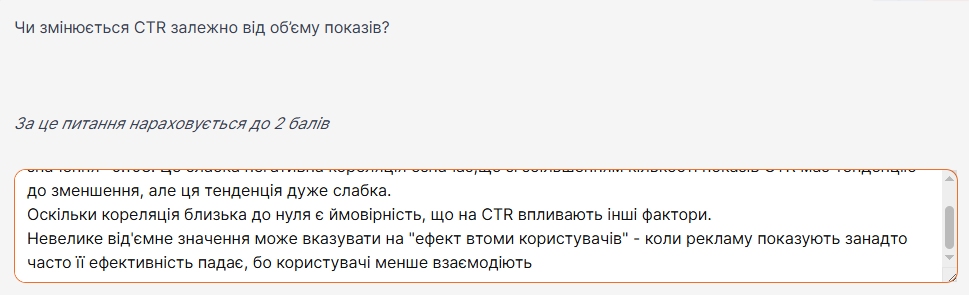

In [15]:
df_Tier1 = df[df.country_group == 'Tier1']
df_Tier1_grouped = df_Tier1.groupby('breed').agg({'clicks': 'sum', 'impressions': 'sum'})
df_Tier1_grouped['CTR'] = df_Tier1_grouped['clicks'] / df_Tier1_grouped['impressions'] * 100
df_Tier1_grouped.sort_values('CTR').tail(1)

clicks  impressions       CTR
breed                               
other   20822       723214  2.879092

In [16]:
# –§—ñ–ª—å—Ç—Ä—É—î–º–æ –¥–∞–Ω—ñ –¥–ª—è TIER1 –∫—Ä–∞—ó–Ω
tier1_df = df[df['country_group'].str.lower().str.strip() == 'tier1']

# –ì—Ä—É–ø—É—î–º–æ –∑–∞ –ø–æ—Ä–æ–¥–æ—é —ñ –æ–±—á–∏—Å–ª—é—î–º–æ CTR
breed_ctr = (
    tier1_df.groupby('breed')
    .agg({'clicks': 'sum', 'impressions': 'sum'})
    .assign(CTR=lambda x: (x['clicks'] / x['impressions']) * 100)
    .sort_values(by='CTR', ascending=False)
)

# –í–∏–≤–æ–¥–∏–º–æ –ø–æ—Ä–æ–¥—É –∑ –Ω–∞–π–≤–∏—â–∏–º CTR
print(breed_ctr.head(1))

       clicks  impressions       CTR
breed                               
other   20822       723214  2.879092


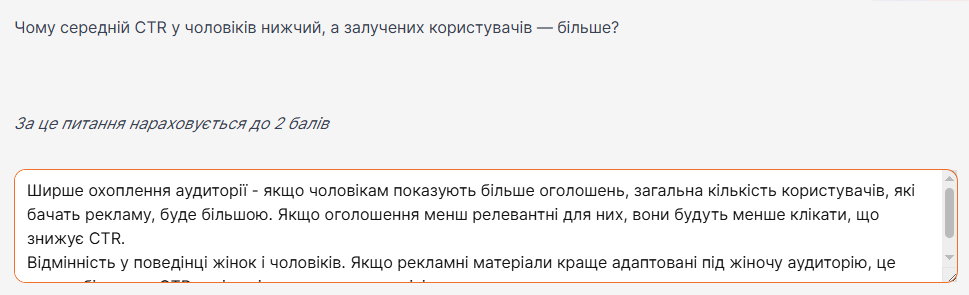

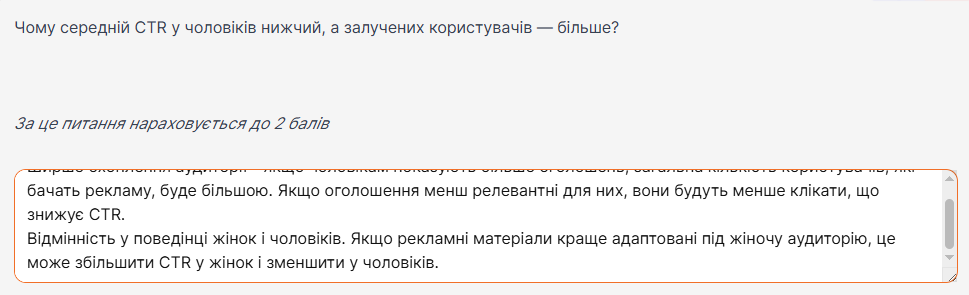

In [17]:
df = df[df['impressions'] > 0]  # —É–Ω–∏–∫–∞—î–º–æ –¥—ñ–ª–µ–Ω–Ω—è –Ω–∞ –Ω—É–ª—å
df['CTR'] = df['clicks'] / df['impressions'] * 100

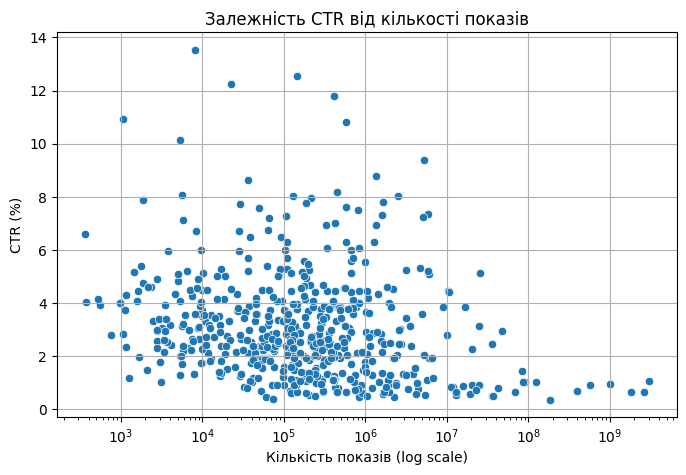

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='impressions', y='CTR', data=df)
plt.xscale('log')  # —è–∫—â–æ –¥–∞–Ω—ñ –º–∞—é—Ç—å –≤–µ–ª–∏–∫–∏–π —Ä–æ–∑–∫–∏–¥
plt.xlabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫–∞–∑—ñ–≤ (log scale)')
plt.ylabel('CTR (%)')
plt.title('–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å CTR –≤—ñ–¥ –∫—ñ–ª—å–∫–æ—Å—Ç—ñ –ø–æ–∫–∞–∑—ñ–≤')
plt.grid(True)
plt.show()

In [19]:
corr = df[['impressions', 'CTR']].corr().iloc[0, 1]
print(f'–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ impressions —ñ CTR: {corr:.3f}')

–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ impressions —ñ CTR: -0.108


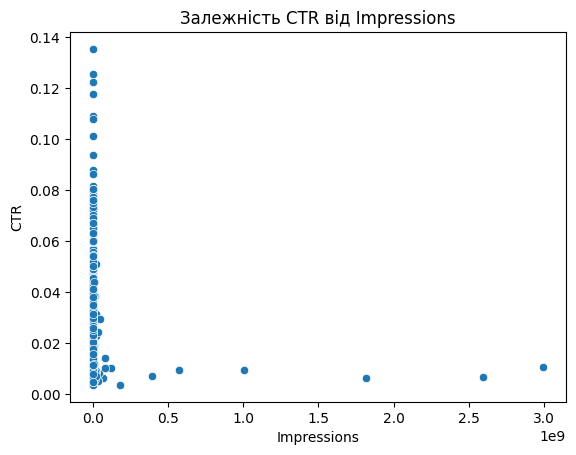

–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ CTR —Ç–∞ Impressions: -0.10754865348189438


In [20]:
df["CTR"] = df["clicks"] / df["impressions"]

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df["impressions"], y=df["CTR"])
plt.xlabel("Impressions")
plt.ylabel("CTR")
plt.title("–ó–∞–ª–µ–∂–Ω—ñ—Å—Ç—å CTR –≤—ñ–¥ Impressions")
plt.show()

corr = df["CTR"].corr(df["impressions"])
print("–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ CTR —Ç–∞ Impressions:", corr)


–¶—ñ–∫–∞–≤–µ —Å–ø–æ—Å—Ç–µ—Ä–µ–∂–µ–Ω–Ω—è! –¶–µ –º–æ–∂–µ –±—É—Ç–∏ –ø–æ–≤‚Äô—è–∑–∞–Ω–æ –∑ –∫—ñ–ª—å–∫–æ–º–∞ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏:

### üîπ **1. –®–∏—Ä—à–µ –æ—Ö–æ–ø–ª–µ–Ω–Ω—è –∞—É–¥–∏—Ç–æ—Ä—ñ—ó**  
–Ø–∫—â–æ —á–æ–ª–æ–≤—ñ–∫–∞–º –ø–æ–∫–∞–∑—É—é—Ç—å –±—ñ–ª—å—à–µ –æ–≥–æ–ª–æ—à–µ–Ω—å, –∑–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤, —è–∫—ñ –±–∞—á–∞—Ç—å —Ä–µ–∫–ª–∞–º—É (`users`), –±—É–¥–µ –±—ñ–ª—å—à–æ—é. –ê–ª–µ **—è–∫—â–æ –æ–≥–æ–ª–æ—à–µ–Ω–Ω—è –º–µ–Ω—à —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ñ** –¥–ª—è –Ω–∏—Ö, –≤–æ–Ω–∏ –±—É–¥—É—Ç—å —Ä—ñ–¥—à–µ –∫–ª—ñ–∫–∞—Ç–∏, —â–æ –∑–Ω–∏–∂—É—î `CTR`.  

### üîπ **2. –í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –≤ –ø–æ–≤–µ–¥—ñ–Ω—Ü—ñ**  
–ß–æ–ª–æ–≤—ñ–∫–∏ —Ç–∞ –∂—ñ–Ω–∫–∏ –º–æ–∂—É—Ç—å –º–∞—Ç–∏ **—Ä—ñ–∑–Ω—ñ –ø–∞—Ç–µ—Ä–Ω–∏ –ø–æ–≤–µ–¥—ñ–Ω–∫–∏ –≤ –æ–Ω–ª–∞–π–Ω-—Ä–µ–∫–ª–∞–º—ñ**. –ù–∞–ø—Ä–∏–∫–ª–∞–¥, —á–æ–ª–æ–≤—ñ–∫–∏ –º–æ–∂—É—Ç—å **—Å–ø–æ–∂–∏–≤–∞—Ç–∏ –±—ñ–ª—å—à–µ –∫–æ–Ω—Ç–µ–Ω—Ç—É**, –∞–ª–µ –Ω–∞—Ç–∏—Å–∫–∞—Ç–∏ –Ω–∞ —Ä–µ–∫–ª–∞–º—É —Ä—ñ–¥—à–µ, —Ç–æ–¥—ñ —è–∫ –∂—ñ–Ω–∫–∏, –Ω–∞–≤–ø–∞–∫–∏, –∫–ª—ñ–∫–Ω—É—Ç—å, —è–∫—â–æ –∫–æ–Ω—Ç–µ–Ω—Ç —ó—Ö –∑–∞—Ü—ñ–∫–∞–≤–∏—Ç—å.  

### üîπ **3. –¢–∏–ø –æ–≥–æ–ª–æ—à–µ–Ω—å**  
–Ø–∫—â–æ —Ä–µ–∫–ª–∞–º–Ω—ñ –º–∞—Ç–µ—Ä—ñ–∞–ª–∏ **–∫—Ä–∞—â–µ –∞–¥–∞–ø—Ç–æ–≤–∞–Ω—ñ** –ø—ñ–¥ –∂—ñ–Ω–æ—á—É –∞—É–¥–∏—Ç–æ—Ä—ñ—é (–±—ñ–ª—å—à –≤–ª—É—á–Ω—ñ –∑–∞–≥–æ–ª–æ–≤–∫–∏, –∑–æ–±—Ä–∞–∂–µ–Ω–Ω—è —á–∏ —Å—Ç–∏–ª—ñ –∫–æ–º—É–Ω—ñ–∫–∞—Ü—ñ—ó), —Ü–µ –º–æ–∂–µ –∑–±—ñ–ª—å—à–∏—Ç–∏ `CTR` —Å–µ—Ä–µ–¥ –∂—ñ–Ω–æ–∫ —ñ –∑–º–µ–Ω—à–∏—Ç–∏ —É —á–æ–ª–æ–≤—ñ–∫—ñ–≤.  

### üîπ **4. –¶—ñ–Ω–∞ –∑–∞ –ø–æ–∫–∞–∑ (CPM) —Ç–∞ —á–∞—Å—Ç–æ—Ç–∞**  
–Ø–∫—â–æ –æ–≥–æ–ª–æ—à–µ–Ω–Ω—è –¥–ª—è —á–æ–ª–æ–≤—ñ–∫—ñ–≤ **–ø–æ–∫–∞–∑—É—é—Ç—å—Å—è —á–∞—Å—Ç—ñ—à–µ** (–≤–∏—â–∏–π `impressions`), –∞–ª–µ –±–µ–∑ –¥–æ—Å—Ç–∞—Ç–Ω—å–æ—ó –ø–µ—Ä—Å–æ–Ω–∞–ª—ñ–∑–∞—Ü—ñ—ó, –≤–æ–Ω–∏ –º–æ–∂—É—Ç—å –º–µ–Ω—à–µ –∑–≤–µ—Ä—Ç–∞—Ç–∏ —É–≤–∞–≥—É –Ω–∞ —Ä–µ–∫–ª–∞–º—É, —â–æ –∑–Ω–∏–∂—É—î `CTR`.  

–©–æ–± –∫—Ä–∞—â–µ –∑—Ä–æ–∑—É–º—ñ—Ç–∏ **–ø—Ä–∏—á–∏–Ω–∏**, –≤–∞—Ä—Ç–æ –ø–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏:  
‚úÖ –ß–∏ —î **—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞** —Ä—ñ–∑–Ω–∏—Ü—è –≤ `CTR` –º—ñ–∂ —á–æ–ª–æ–≤—ñ–∫–∞–º–∏ —Ç–∞ –∂—ñ–Ω–∫–∞–º–∏?  
‚úÖ –Ø–∫ –∑–º—ñ–Ω—é—î—Ç—å—Å—è `CTR` –≤ —Ä—ñ–∑–Ω–∏—Ö –≥—Ä—É–ø–∞—Ö (`audience`, `country_group`)?  
‚úÖ –ß–∏ —Ä—ñ–∑–Ω–∏–π `CPM` –¥–ª—è —Ä–µ–∫–ª–∞–º–∏ —á–æ–ª–æ–≤—ñ–∫—ñ–≤ vs. –∂—ñ–Ω–æ–∫?  

–Ø–∫—â–æ —Ö–æ—á–µ—à –ø–æ–±—É–¥—É–≤–∞—Ç–∏ –±—ñ–ª—å—à –≥–ª–∏–±–æ–∫–∏–π –∞–Ω–∞–ª—ñ–∑‚Äî–º–æ–∂–µ–º–æ –¥–æ—Å–ª—ñ–¥–∏—Ç–∏ —Ä–∞–∑–æ–º! üöÄ


In [21]:
import pandas as pd

# –û–±—á–∏—Å–ª–µ–Ω–Ω—è —Å–µ—Ä–µ–¥–Ω—å–æ–≥–æ CTR –∑–∞ —Å—Ç–∞—Ç—Ç—é
ctr_by_gender = df.groupby("audience")["CTR"].mean()
print(ctr_by_gender)


audience
Both      0.036506
Female    0.024612
Male      0.031278
Name: CTR, dtype: float64


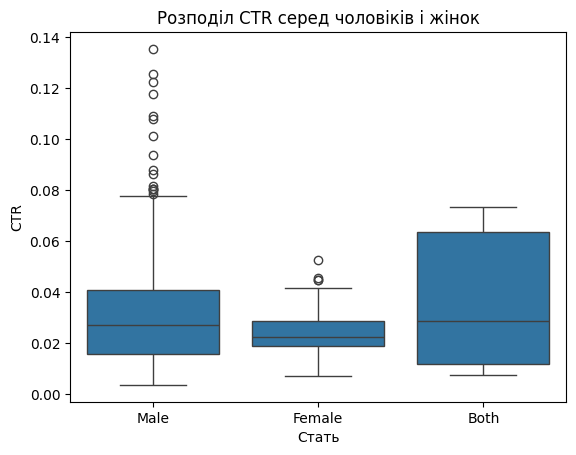

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["audience"], y=df["CTR"])
plt.xlabel("–°—Ç–∞—Ç—å")
plt.ylabel("CTR")
plt.title("–†–æ–∑–ø–æ–¥—ñ–ª CTR —Å–µ—Ä–µ–¥ —á–æ–ª–æ–≤—ñ–∫—ñ–≤ —ñ –∂—ñ–Ω–æ–∫")
plt.show()


In [23]:
from scipy.stats import ttest_ind

# –§—ñ–ª—å—Ç—Ä—É—î–º–æ –¥–∞–Ω—ñ –∑–∞ —Å—Ç–∞—Ç—Ç—é
ctr_male = df[df["audience"] == "Male"]["CTR"]
ctr_female = df[df["audience"] == "Female"]["CTR"]

# t-—Ç–µ—Å—Ç –Ω–∞ –ø–µ—Ä–µ–≤—ñ—Ä–∫—É –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π
t_stat, p_value = ttest_ind(ctr_male, ctr_female, equal_var=False)
print(f"T-stat: {t_stat}, P-value: {p_value}")

# –Ü–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
if p_value < 0.05:
    print("–°—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ CTR —É —á–æ–ª–æ–≤—ñ–∫—ñ–≤ —Ç–∞ –∂—ñ–Ω–æ–∫.")
else:
    print("–í—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ –Ω–µ —î —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∏–º–∏.")


T-stat: 4.159799077896208, P-value: 5.614078885691565e-05
–°—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â–∞ —Ä—ñ–∑–Ω–∏—Ü—è –º—ñ–∂ CTR —É —á–æ–ª–æ–≤—ñ–∫—ñ–≤ —Ç–∞ –∂—ñ–Ω–æ–∫.


–ß—É–¥–æ–≤–∞ —Ä–æ–±–æ—Ç–∞! üí° –†–µ–∑—É–ª—å—Ç–∞—Ç–∏ –ø–æ–∫–∞–∑—É—é—Ç—å **—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–Ω–æ –∑–Ω–∞—á—É—â—É** —Ä—ñ–∑–Ω–∏—Ü—é –≤ CTR –º—ñ–∂ —á–æ–ª–æ–≤—ñ–∫–∞–º–∏ —Ç–∞ –∂—ñ–Ω–∫–∞–º–∏ (`p-value` –¥—É–∂–µ –º–∞–ª–∏–π, —â–æ –æ–∑–Ω–∞—á–∞—î, —â–æ —Ü—è –≤—ñ–¥–º—ñ–Ω–Ω—ñ—Å—Ç—å –Ω–µ –≤–∏–ø–∞–¥–∫–æ–≤–∞).  

### üîç **–©–æ —Ü–µ –æ–∑–Ω–∞—á–∞—î?**
1Ô∏è‚É£ **CTR —É –∂—ñ–Ω–æ–∫ –Ω–∏–∂—á–∏–π –∑–∞ —á–æ–ª–æ–≤—ñ–∫—ñ–≤** (`0.0246` vs. `0.0313`).  
   - –¶–µ –º–æ–∂–µ –≤–∫–∞–∑—É–≤–∞—Ç–∏ –Ω–∞ **–º–µ–Ω—à—É –∑–∞–ª—É—á–µ–Ω—ñ—Å—Ç—å** –∂—ñ–Ω–æ–∫ –¥–æ —Ä–µ–∫–ª–∞–º–∏ –≤ —Ü—å–æ–º—É –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–º—É –∫–æ–Ω—Ç–µ–∫—Å—Ç—ñ.  
   - –ü—Ä–∏—á–∏–Ω–∏ –º–æ–∂—É—Ç—å –≤–∫–ª—é—á–∞—Ç–∏ **—Ç–∏–ø –æ–≥–æ–ª–æ—à–µ–Ω—å, —Ñ–æ—Ä–º–∞—Ç, —Ç–µ–º–∞—Ç–∏–∫—É** –∞–±–æ **–ø–æ–≤–µ–¥—ñ–Ω–∫–æ–≤—ñ –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç—ñ** –º—ñ–∂ —Å—Ç–∞—Ç—è–º–∏.  

2Ô∏è‚É£ **CTR —É –≥—Ä—É–ø—ñ "Both" –Ω–∞–π–≤–∏—â–∏–π** (`0.0365`).  
   - –¶–µ –º–æ–∂–µ –æ–∑–Ω–∞—á–∞—Ç–∏, —â–æ –∑–º—ñ—à–∞–Ω—ñ –∞—É–¥–∏—Ç–æ—Ä—ñ—ó –∑–∞–≥–∞–ª–æ–º –º–∞—é—Ç—å **–±—ñ–ª—å—à –≤–∏—Å–æ–∫—É –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å** —Ä–µ–∫–ª–∞–º–∏, –º–æ–∂–ª–∏–≤–æ, –∑–∞–≤–¥—è–∫–∏ **—à–∏—Ä—à–æ–º—É –æ—Ö–æ–ø–ª–µ–Ω–Ω—é** –∞–±–æ –∑–∞–≥–∞–ª—å–Ω–æ–º—É –±–∞–ª–∞–Ω—Å—É –∑–∞—Ü—ñ–∫–∞–≤–ª–µ–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤.  

3Ô∏è‚É£ **T-—Ç–µ—Å—Ç –ø—ñ–¥—Ç–≤–µ—Ä–¥–∏–≤ –∑–Ω–∞—á—É—â—ñ—Å—Ç—å –≤—ñ–¥–º—ñ–Ω–Ω–æ—Å—Ç–µ–π**  
   - –û—Å–∫—ñ–ª—å–∫–∏ `p-value` **–¥—É–∂–µ –º–∞–ª–µ–Ω—å–∫–∏–π** (`5.61e-05`), –º–æ–∂–Ω–∞ –∑ —É–ø–µ–≤–Ω–µ–Ω—ñ—Å—Ç—é —Å–∫–∞–∑–∞—Ç–∏, —â–æ –≤—ñ–¥–º—ñ–Ω–Ω—ñ—Å—Ç—å **–Ω–µ –≤–∏–ø–∞–¥–∫–æ–≤–∞**.  
   - –¶–µ –æ–∑–Ω–∞—á–∞—î, —â–æ –≤–∞—Ä—Ç–æ **–∞–Ω–∞–ª—ñ–∑—É–≤–∞—Ç–∏, —â–æ —Å–∞–º–µ –≤–ø–ª–∏–≤–∞—î –Ω–∞ CTR —á–æ–ª–æ–≤—ñ–∫—ñ–≤ —Ç–∞ –∂—ñ–Ω–æ–∫**.  

### üöÄ **–©–æ –º–æ–∂–Ω–∞ –∑—Ä–æ–±–∏—Ç–∏ –¥–∞–ª—ñ?**
‚úî **–ü–µ—Ä–µ–≥–ª—è–Ω—É—Ç–∏ —Ä–µ–∫–ª–∞–º–Ω—ñ –º–∞—Ç–µ—Ä—ñ–∞–ª–∏**‚Äî—á–∏ –≤–æ–Ω–∏ –∞–¥–∞–ø—Ç–æ–≤–∞–Ω—ñ –¥–æ –æ–±–æ—Ö –∞—É–¥–∏—Ç–æ—Ä—ñ–π?  
‚úî **–ü—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –ø–æ–≤–µ–¥—ñ–Ω–∫—É –∫–ª—ñ–∫—ñ–≤**‚Äî–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, —á–∏ –∂—ñ–Ω–∫–∏ –≤–∑–∞—î–º–æ–¥—ñ—é—Ç—å –∑ —ñ–Ω—à–∏–º–∏ —Ñ–æ—Ä–º–∞—Ç–∞–º–∏ —Ä–µ–∫–ª–∞–º–∏ –∫—Ä–∞—â–µ?  
‚úî **–ü–µ—Ä–µ–≥–ª—è–Ω—É—Ç–∏ CPM —Ç–∞ —Ä–æ–∑–ø–æ–¥—ñ–ª –ø–æ–∫–∞–∑—ñ–≤**‚Äî–º–æ–∂–ª–∏–≤–æ, –¥–ª—è –∂—ñ–Ω–æ–∫ —á–∞—Å—Ç–æ—Ç–∞ –ø–æ–∫–∞–∑—ñ–≤ –≤–∏—â–∞, –∞–ª–µ –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –Ω–∏–∂—á–∞?  

–Ø–∫—â–æ —Ö–æ—á–µ—à —Ä–æ–∑—à–∏—Ä–∏—Ç–∏ –∞–Ω–∞–ª—ñ–∑, –º–æ–∂—É –¥–æ–ø–æ–º–æ–≥—Ç–∏! üîçüî•



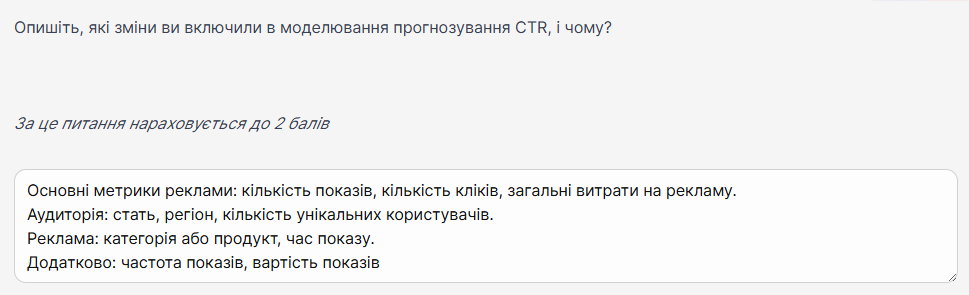

–î–ª—è –ø–æ–±—É–¥–æ–≤–∏ **–º–æ–¥–µ–ª—ñ –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞–Ω–Ω—è CTR** –≤–∞—Ä—Ç–æ –≤–∫–ª—é—á–∏—Ç–∏ –∑–º—ñ–Ω–Ω—ñ, —è–∫—ñ –º–æ–∂—É—Ç—å –≤–ø–ª–∏–≤–∞—Ç–∏ –Ω–∞ **–π–º–æ–≤—ñ—Ä–Ω—ñ—Å—Ç—å –∫–ª—ñ–∫—É**. –û—Å—å –æ—Å–Ω–æ–≤–Ω—ñ —Ñ–∞–∫—Ç–æ—Ä–∏:

### üîπ **1. –û—Å–Ω–æ–≤–Ω—ñ –º–µ—Ç—Ä–∏–∫–∏ —Ä–µ–∫–ª–∞–º–∏**
‚úÖ `impressions` ‚Äì –∫—ñ–ª—å–∫—ñ—Å—Ç—å –ø–æ–∫–∞–∑—ñ–≤. –í–ø–ª–∏–≤–∞—î –Ω–∞ —á–∞—Å—Ç–æ—Ç—É –≤–∑–∞—î–º–æ–¥—ñ—ó.  
‚úÖ `clicks` ‚Äì –∑–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –∫–ª—ñ–∫—ñ–≤. –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—î—Ç—å—Å—è –¥–ª—è –æ–±—á–∏—Å–ª–µ–Ω–Ω—è CTR.  
‚úÖ `costs` ‚Äì –∑–∞–≥–∞–ª—å–Ω—ñ –≤–∏—Ç—Ä–∞—Ç–∏ –Ω–∞ —Ä–µ–∫–ª–∞–º—É. –ú–æ–∂–µ –ø–æ–∫–∞–∑–∞—Ç–∏ –µ—Ñ–µ–∫—Ç–∏–≤–Ω—ñ—Å—Ç—å –∫–∞–º–ø–∞–Ω—ñ–π.  

### üîπ **2. –ê—É–¥–∏—Ç–æ—Ä–Ω—ñ —Ñ–∞–∫—Ç–æ—Ä–∏**
‚úÖ `audience` ‚Äì —Å—Ç–∞—Ç—å (Male/Female/Both). –Ø–∫ –º–∏ –≤–∂–µ –±–∞—á–∏–ª–∏, CTR –∑–∞–ª–µ–∂–∏—Ç—å –≤—ñ–¥ —Å—Ç–∞—Ç—ñ.  
‚úÖ `country_group` ‚Äì –≥–µ–æ–≥—Ä–∞—Ñ—ñ—è —Ä–µ–∫–ª–∞–º–∏. –í–ø–ª–∏–≤–∞—î –Ω–∞ –ø–æ–≤–µ–¥—ñ–Ω–∫—É –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤.  
‚úÖ `users` ‚Äì –∫—ñ–ª—å–∫—ñ—Å—Ç—å —É–Ω—ñ–∫–∞–ª—å–Ω–∏—Ö –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á—ñ–≤. –ú–æ–∂–µ –≤–ø–ª–∏–≤–∞—Ç–∏ –Ω–∞ –∑–∞–≥–∞–ª—å–Ω–∏–π CTR.  

### üîπ **3. –û—Å–æ–±–ª–∏–≤–æ—Å—Ç—ñ —Ä–µ–∫–ª–∞–º–∏**
‚úÖ `ad_id` ‚Äì —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä –æ–≥–æ–ª–æ—à–µ–Ω–Ω—è. –î–æ–∑–≤–æ–ª—è—î –≤—Ä–∞—Ö–æ–≤—É–≤–∞—Ç–∏ –≤–ø–ª–∏–≤ —Ä—ñ–∑–Ω–∏—Ö –∫—Ä–µ–∞—Ç–∏–≤—ñ–≤.  
‚úÖ `breed` ‚Äì –∫–∞—Ç–µ–≥–æ—Ä—ñ—è –ø—Ä–æ–¥—É–∫—Ç—É –∞–±–æ –∫–æ–Ω—Ç–µ–Ω—Ç—É. –î–µ—è–∫—ñ —Ç–µ–º–∞—Ç–∏–∫–∏ –º–æ–∂—É—Ç—å –∑–∞–ª—É—á–∞—Ç–∏ –±—ñ–ª—å—à–µ –∫–ª—ñ–∫—ñ–≤.  
‚úÖ `time_of_day` ‚Äì —á–∞—Å –ø–æ–∫–∞–∑—É. –í–µ—á—ñ—Ä –º–æ–∂–µ –±—É—Ç–∏ –±—ñ–ª—å—à –µ—Ñ–µ–∫—Ç–∏–≤–Ω–∏–º –¥–ª—è –∫–ª—ñ–∫—ñ–≤, –Ω—ñ–∂ —Ä–∞–Ω–æ–∫.  

### üîπ **4. –î–æ–¥–∞—Ç–∫–æ–≤—ñ –∑–º—ñ–Ω–Ω—ñ**
‚úÖ **–í–∑–∞—î–º–æ–¥—ñ—ó (Engagement)** ‚Äì –Ω–∞–ø—Ä–∏–∫–ª–∞–¥, `like_ratio`, `comment_ratio`.  
‚úÖ **CPM** ‚Äì –≤–∞—Ä—Ç—ñ—Å—Ç—å —Ç–∏—Å—è—á—ñ –ø–æ–∫–∞–∑—ñ–≤, –º–æ–∂–µ –ø–æ–∫–∞–∑–∞—Ç–∏ –∑–∞–ª–µ–∂–Ω—ñ—Å—Ç—å –≤–∏—Ç—Ä–∞—Ç —ñ –∫–ª—ñ–∫—ñ–≤.  
‚úÖ **–ß–∞—Å—Ç–æ—Ç–∞ –ø–æ–∫–∞–∑—ñ–≤** (`frequency`) ‚Äì —è–∫ —á–∞—Å—Ç–æ –∫–æ—Ä–∏—Å—Ç—É–≤–∞—á –±–∞—á–∏–≤ —Ä–µ–∫–ª–∞–º—É.  

### üéØ **–©–æ —Ä–æ–±–∏—Ç–∏ –¥–∞–ª—ñ?**
‚úî –ü–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏ –∫–æ—Ä–µ–ª—è—Ü—ñ—é –º—ñ–∂ CTR —Ç–∞ –∑–º—ñ–Ω–Ω–∏–º–∏, —â–æ–± –∑–Ω–∞–π—Ç–∏ –Ω–∞–π–±—ñ–ª—å—à –∑–Ω–∞—á—É—â—ñ.  
‚úî –ü–æ–±—É–¥—É–≤–∞—Ç–∏ –ø—Ä–æ—Å—Ç—É **–ª—ñ–Ω—ñ–π–Ω—É –∞–±–æ –ª–æ–≥—ñ—Å—Ç–∏—á–Ω—É —Ä–µ–≥—Ä–µ—Å—ñ—é** –¥–ª—è —Ç–µ—Å—Ç—É–≤–∞–Ω–Ω—è –º–æ–¥–µ–ª—ñ.  
‚úî –î–æ—Å–ª—ñ–¥–∏—Ç–∏ **–≤–∑–∞—î–º–æ–¥—ñ—é –∑–º—ñ–Ω–Ω–∏—Ö** (–Ω–∞–ø—Ä–∏–∫–ª–∞–¥, –≤–ø–ª–∏–≤ CPM + audience –Ω–∞ CTR).  

–Ø–∫—â–æ —Ö–æ—á–µ—à –ø–æ–±—É–¥—É–≤–∞—Ç–∏ –º–æ–¥–µ–ª—å —Ä–∞–∑–æ–º‚Äî–º–æ–∂–µ–º–æ —Å–ø—Ä–æ–±—É–≤–∞—Ç–∏! üöÄ  



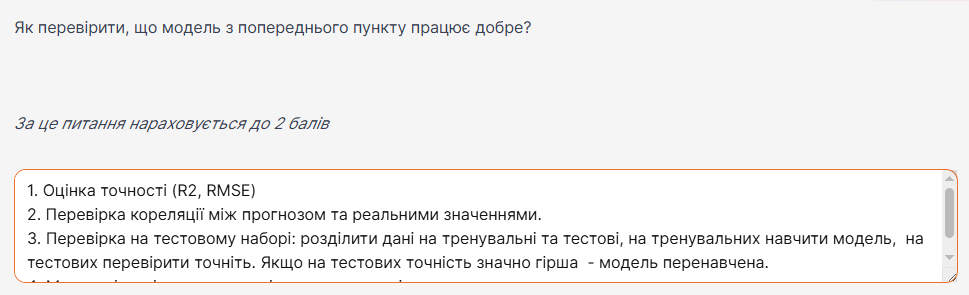

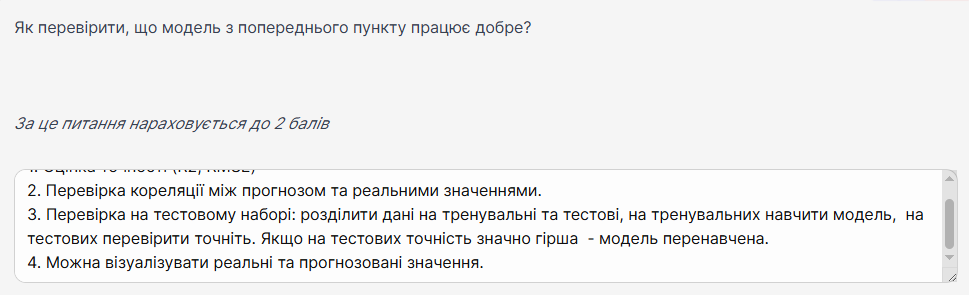

–ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ –ø—Ä–æ–≥–Ω–æ–∑—É–≤–∞–Ω–Ω—è **CTR** –≤–∫–ª—é—á–∞—î –∫—ñ–ª—å–∫–∞ –∫–ª—é—á–æ–≤–∏—Ö –µ—Ç–∞–ø—ñ–≤:

### üîπ **1. –û—Ü—ñ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ**
‚úÖ **R¬≤ (–∫–æ–µ—Ñ—ñ—Ü—ñ—î–Ω—Ç –¥–µ—Ç–µ—Ä–º—ñ–Ω–∞—Ü—ñ—ó)**‚Äî–ø–æ–∫–∞–∑—É—î, –Ω–∞—Å–∫—ñ–ª—å–∫–∏ –¥–æ–±—Ä–µ –º–æ–¥–µ–ª—å –ø–æ—è—Å–Ω—é—î –≤–∞—Ä—ñ–∞—Ü—ñ—é `CTR`.  
```python
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R¬≤: {r2:.4f}")
```
–Ø–∫—â–æ `R¬≤` **–±–ª–∏–∑—å–∫–µ –¥–æ 1**, –º–æ–¥–µ–ª—å –¥–æ–±—Ä–µ –ø—Ä–æ–≥–Ω–æ–∑—É—î `CTR`. –Ø–∫—â–æ **–±–ª–∏–∑—å–∫–µ –¥–æ 0**, –º–æ–¥–µ–ª—å —Å–ª–∞–±–∫–∞.  

‚úÖ **RMSE (–∫–æ—Ä—ñ–Ω—å —Å–µ—Ä–µ–¥–Ω—å–æ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ—ó –ø–æ–º–∏–ª–∫–∏)**‚Äî–æ—Ü—ñ–Ω—é—î —Å–µ—Ä–µ–¥–Ω—é –ø–æ—Ö–∏–±–∫—É –ø—Ä–æ–≥–Ω–æ–∑—É.  
```python
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse:.4f}")
```
–ú–µ–Ω—à–µ –∑–Ω–∞—á–µ–Ω–Ω—è `RMSE`‚Äî–∫—Ä–∞—â–∞ —Ç–æ—á–Ω—ñ—Å—Ç—å.  

### üîπ **2. –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –∫–æ—Ä–µ–ª—è—Ü—ñ—ó –º—ñ–∂ –ø—Ä–æ–≥–Ω–æ–∑–æ–º —Ç–∞ —Ä–µ–∞–ª—å–Ω–∏–º CTR**  
```python
import pandas as pd

df_results = pd.DataFrame({"Actual": y_true, "Predicted": y_pred})
correlation = df_results.corr().iloc[0, 1]
print(f"–ö–æ—Ä–µ–ª—è—Ü—ñ—è –º—ñ–∂ —Ä–µ–∞–ª—å–Ω–∏–º —ñ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω–∏–º CTR: {correlation:.4f}")
```
–Ø–∫—â–æ –∫–æ—Ä–µ–ª—è—Ü—ñ—è **–±–ª–∏–∑—å–∫–∞ –¥–æ 1**, –º–æ–¥–µ–ª—å –¥–æ–±—Ä–µ –ø—Ä–æ–≥–Ω–æ–∑—É—î `CTR`.  

### üîπ **3. –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è —Ç–æ—á–Ω–æ—Å—Ç—ñ**
‚úÖ **–ì—Ä–∞—Ñ—ñ–∫ —Ä–æ–∑—Å—ñ—é–≤–∞–Ω–Ω—è —Ä–µ–∞–ª—å–Ω–∏—Ö vs. –ø—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å**
```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=y_true, y=y_pred)
plt.xlabel("–§–∞–∫—Ç–∏—á–Ω–∏–π CTR")
plt.ylabel("–ü—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω–∏–π CTR")
plt.title("–ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç—ñ –ø—Ä–æ–≥–Ω–æ–∑—É")
plt.show()
```
–Ø–∫—â–æ —Ç–æ—á–∫–∏ **—Ä–æ–∑—Ç–∞—à–æ–≤–∞–Ω—ñ –≤–∑–¥–æ–≤–∂ –ª—ñ–Ω—ñ—ó y = x**, –º–æ–¥–µ–ª—å –ø—Ä–∞—Ü—é—î –¥–æ–±—Ä–µ.  

### üîπ **4. –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º—É –Ω–∞–±–æ—Ä—ñ**
–†–æ–∑–¥—ñ–ª–∏–º–æ –¥–∞–Ω—ñ –Ω–∞ **—Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ** —Ç–∞ **—Ç–µ—Å—Ç–æ–≤—ñ**, —â–æ–± –ø–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏ –º–æ–¥–µ–ª—å:  
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
–Ø–∫—â–æ —Ç–æ—á–Ω—ñ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–∏—Ö –¥–∞–Ω–∏—Ö **—Å–∏–ª—å–Ω–æ –≥—ñ—Ä—à–∞**, –º–æ–¥–µ–ª—å **–ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–∞**.  

---
üéØ **–í–∏—Å–Ω–æ–≤–∫–∏:**  
‚úî –Ø–∫—â–æ `R¬≤` –≤–∏—Å–æ–∫–∏–π, –∞ `RMSE` –Ω–∏–∑—å–∫–∏–π‚Äî–º–æ–¥–µ–ª—å –¥–æ–±—Ä–µ –ø—Ä–∞—Ü—é—î.  
‚úî –Ø–∫—â–æ –∫–æ—Ä–µ–ª—è—Ü—ñ—è `Actual vs. Predicted` **–±–ª–∏–∑—å–∫–∞ –¥–æ 1**‚Äî–º–æ–¥–µ–ª—å —Ç–æ—á–Ω–æ –ø—Ä–æ–≥–Ω–æ–∑—É—î `CTR`.  
‚úî –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –¥–æ–ø–æ–º–æ–∂–µ –∑–Ω–∞–π—Ç–∏ **–∞–Ω–æ–º–∞–ª—å–Ω—ñ —Ç–æ—á–∫–∏**.  

–Ø–∫—â–æ –ø–æ—Ç—Ä—ñ–±–Ω–æ —â–µ —â–æ—Å—å –ø–µ—Ä–µ–≤—ñ—Ä–∏—Ç–∏‚Äî–∑–∞–ø–∏—Ç—É–π! üöÄ



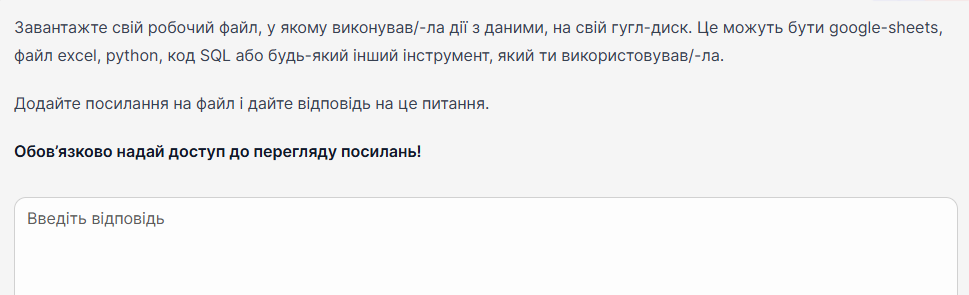